In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import umap.umap_ as umap

In [24]:
#data = pd.read_csv('topic_score.csv')
data = pd.read_csv('X_lsi.csv')

In [25]:
book_name = pd.read_csv('clean_data.csv')
book_name = book_name.reset_index()

In [26]:
data = data.merge(book_name,how='left',left_on=['Unnamed: 0'],right_on=['index'])

In [27]:
data = data.iloc[:,1:10]

In [28]:
data.head(3)

,0,1,2,3,4,5,Title_x,index,Title_y
0,-1.370463,0.449285,-0.203513,0.041232,0.761712,0.759382,The Day of the Pelican,0,The Day of the Pelican
1,-2.328222,-0.957660,-1.135634,-0.576697,0.018853,-0.483099,The Lost World of British Communism,1,The Lost World of British Communism
2,-2.908318,-1.557660,-0.913394,0.163993,0.500000,0.654194,Village of Secrets,2,Village of Secrets


In [29]:
data = pd.concat([data.iloc[:,0:6], data.iloc[:,8]], axis=1)  
genre = pd.read_csv('book_genre.csv')
new = genre.merge(data,how='left',left_on=['Title'],right_on=['Title_y'])

In [32]:
new.head(3)

,Title,fantasy,science,horror,thriller,mystery,detective,history,young,children,0,1,2,3,4,5,Title_y,genre,genre_index
0,Ratha and Thistle-chaser,1,0,0,0,0,0,0,0,0,-2.585401,1.313565,0.773392,0.313269,0.010342,-0.287630,Ratha and Thistle-chaser,fantasy,1
1,The Plague Dogs,0,1,0,0,0,0,0,0,0,-0.950439,-0.059769,0.025305,0.109237,-0.208187,-0.179560,The Plague Dogs,science,2
2,The Pirates of Malaysia,0,0,0,0,0,0,0,1,0,-0.881709,0.005471,0.098885,0.128868,-0.125826,0.202709,The Pirates of Malaysia,young,8


In [31]:
### 9个类
category_name = new.columns
types = []
types_index = []
for i in range(len(new)):
    for k in range(1,10):
        if new.iloc[i, k] == 1:
            types.append(category_name[k])
            types_index.append(k)
            break 
new['genre'] = types
new['genre_index'] = types_index

In [33]:
new = new.iloc[:,[10,11,12,13,14,15,0,17,18]]

In [34]:
new.to_csv('classification.csv', index=False)

### All 9 categories.

Text(0.5, 1.0, 'Umap Embedding For 9 Genres')

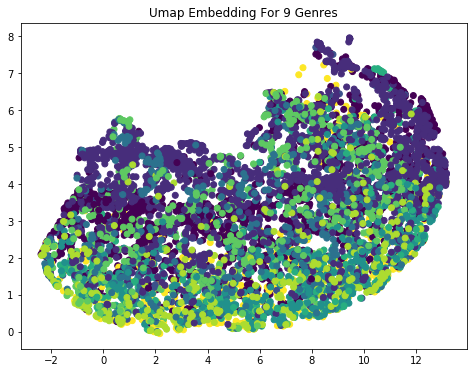

In [67]:
mapper = umap.UMAP(n_components=2).fit_transform(new.iloc[:,:6])
plt.figure(figsize=[8,6])
plt.scatter(mapper[:,0], mapper[:,1], c=list(new.genre_index))
plt.title('Umap Embedding For 9 Genres')

In [68]:
def plot(type1,type2,color,title):
    mapper = umap.UMAP(n_components=2).fit_transform(new.iloc[type1+type2,:6])
    plt.figure(figsize=[8,6])
    plt.scatter(mapper[:,0], mapper[:,1], c=color)
    plt.title(title)

## fantasy vs. science

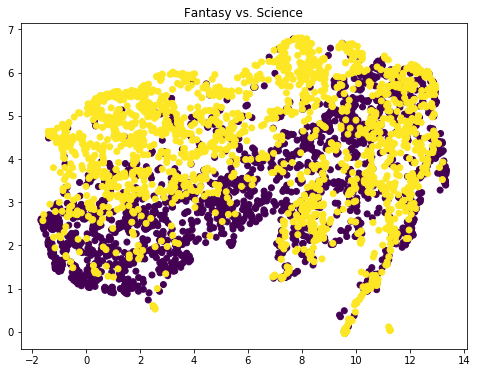

In [69]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==1]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==2]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color,'Fantasy vs. Science')

## Horror vs. Thriller

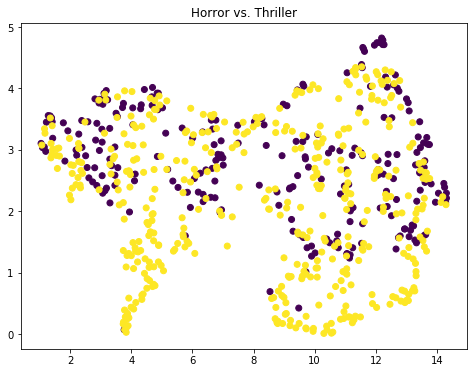

In [70]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==3]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==4]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Horror vs. Thriller')

## Fantasy vs. Mystery

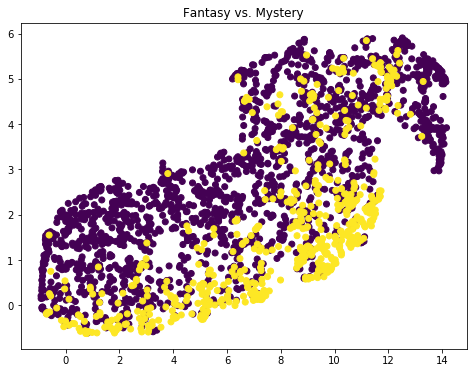

In [71]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==1]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==5]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Fantasy vs. Mystery')

## Mystery vs. Children

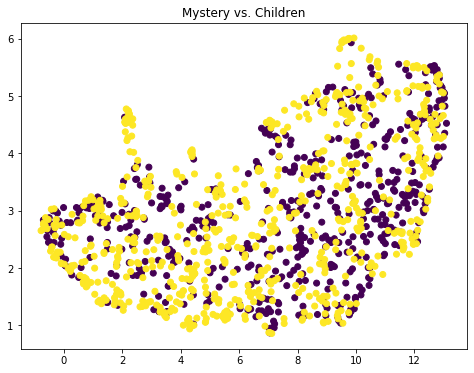

In [72]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==5]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==9]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Mystery vs. Children')

## Science vs. History

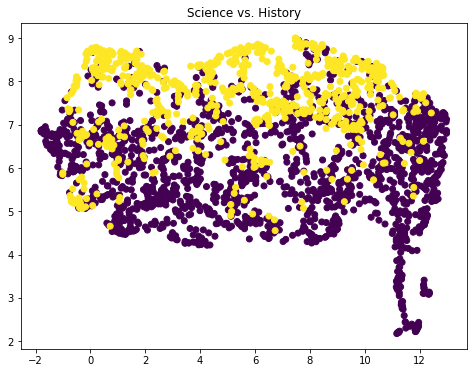

In [73]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==2]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==7]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Science vs. History')

## Detective vs. History

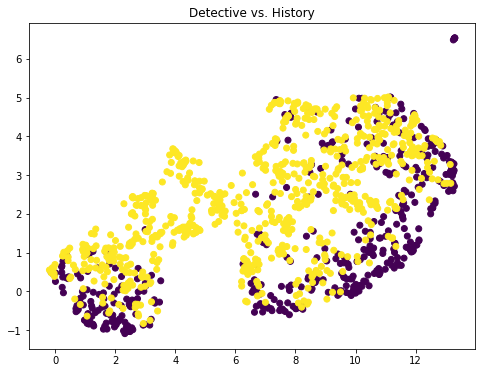

In [75]:
type1 = [i for i in range(len(new)) if new.iloc[i,-1]==6]
type2 = [i for i in range(len(new)) if new.iloc[i,-1]==7]
color = [1]*len(type1) + [2]*len(type2)

plot(type1,type2,color, 'Detective vs. History')